<a href="https://colab.research.google.com/github/hrshwrdhn/ai_cheat/blob/main/L7_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change Runtime Environment:
Click the “Runtime” dropdown menu. Select “Change runtime type”. then "GPU"

## To mount your google drive for code and file 
```
from google.colab import drive 
drive.mount('/mydrive') 
```


#Tensor

## import torch

In [ ]:
import torch

In [ ]:
t1 = torch.tensor([5 ])
print(t1)
print( type(t1))
print(t1.shape)

print(t1.dtype)

tensor([5])
<class 'torch.Tensor'>
torch.Size([1])
torch.int64


In [ ]:

A = torch.tensor( 4)  # single number
B =  torch.tensor([1., 2, 3, 4]) #array
C= torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]]) # matrix 2d
print(A)
print(B)
print(C)


tensor([4.])
tensor([1., 2., 3., 4.])
tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


In [ ]:
D = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])  # matrix 3d
print(D)
print(D.dtype)
print(type(D))
print(D.shape)

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])
torch.float32
<class 'torch.Tensor'>
torch.Size([2, 2, 3])


In [ ]:
# Matrix
A1 = torch.tensor([[5., 6, 11], 
                   [7, 8], 
                   [9, 10]])
print(A1)

ValueError: ignored

A ValueError is thrown because the lengths of the rows [5., 6, 11] and [7, 8] don't match.


In [ ]:
print(D.shape)

torch.Size([2, 2, 3])


In [ ]:
import numpy as np
a3dim  =  np.array([ [ [1,2,3], [1,2,3] ] , [   [2,3,4] ,[4,5,6]] ])
a3dim.shape

# Tensor operations and gradients

In [ ]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)  # need to calculate the gradient of
b = torch.tensor(5., requires_grad=True)

print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


In [ ]:
# Arithmetic operations
y = w * x + b  
# Compute derivatives
y.backward()

In [ ]:
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, dy/dw has the same value as x, i.e., 3, and dy/db has the value 1. Note that x.grad is None because x doesn't have requires_grad set to True.

The "grad" in w.grad is short for gradient, which is another term for derivative. The term gradient is primarily used while dealing with vectors and matrices

# Tensor functions

In [ ]:
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])

# Create a tensor with a fixed value for every element
t6 = torch.full((3, 2), 42)
# Concatenate two tensors with compatible shapes
t7 = torch.cat((t3, t6),axis = 1 )
# Compute the sin of each element
t8 = torchs(t7.co)
# Change the shape of a tensor
t9 = t8.reshape(3, 2, 2)
print(t3)
print(t6)
print(t7)
print(t8)
print(t9)

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
tensor([[42, 42],
        [42, 42],
        [42, 42]])
tensor([[ 5.,  6., 42., 42.],
        [ 7.,  8., 42., 42.],
        [ 9., 10., 42., 42.]])
tensor([[ 0.2837,  0.9602, -0.4000, -0.4000],
        [ 0.7539, -0.1455, -0.4000, -0.4000],
        [-0.9111, -0.8391, -0.4000, -0.4000]])
tensor([[[ 0.2837,  0.9602],
         [-0.4000, -0.4000]],

        [[ 0.7539, -0.1455],
         [-0.4000, -0.4000]],

        [[-0.9111, -0.8391],
         [-0.4000, -0.4000]]])


# numpy, tensor 

In [ ]:
import numpy as np
a_np= np.array([ [1,2,3], [4,5,6],[7,8,9]])
print(a_np)
print(type(a_np))

a_tensor = torch.from_numpy(a_np)
print(a_tensor)
print(type(a_tensor))
a_tensor = a_tensor + 1

b = a_tensor.numpy()
print(type(b))
print(b)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


In [ ]:
y = np.array([4,5,6,7,8])  # actual output
ypred = np.array([3,2,3,1,3])  # predicted output
loss = ypred - y
print(loss)
( np.square(ypred - y ) ).sum() / 5

The interoperability between PyTorch and Numpy is essential because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.

# gradient descent

## Introduction to Linear Regression

![linear-regression-training-data](https://i.imgur.com/6Ujttb4.png)

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:

![linear-regression-graph](https://i.imgur.com/4DJ9f8X.png)

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


model* is simply a function that performs a matrix multiplication of the `inputs` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

![matrix-mult](https://i.imgur.com/WGXLFvA.png)

In [ ]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)  # numpy.randn
b = torch.randn(2, requires_grad=True)
print(w)
print(b)


tensor([[-1.0206, -2.0182,  0.4082],
        [ 0.0131, -0.1685,  0.2656]], requires_grad=True)
tensor([-0.2890, -1.2771], requires_grad=True)


In [ ]:
# define model
def model(x):
    return x @ w.t() + b


In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-1.9246e+02, -1.8944e-01],
        [-2.4464e+02,  2.0853e+00],
        [-3.3584e+02, -7.3134e+00],
        [-1.7607e+02,  2.6427e+00],
        [-2.3588e+02,  2.0417e+00]], grad_fn=<AddBackward0>)


# Loss function

Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

Calculate the difference between the two matrices (preds and targets).
 Square all elements of the difference matrix to remove negative values.
    Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the mean squared error (MSE).

In [ ]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()
# .numel Returns the total number of elements in the  tensor

In [ ]:
# Compute loss
loss = mse(preds, targets)
print(loss)


tensor(57797.6328, grad_fn=<DivBackward0>)


## Compute gradients

With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have `requires_grad` set to `True`. We'll see how this is useful in just a moment.

In [ ]:
# Compute gradients
loss.backward()    # dy/dw and dy/db
# Gradients for weights
print(w)
print(w.grad)

tensor([[-1.0206, -2.0182,  0.4082],
        [ 0.0131, -0.1685,  0.2656]], requires_grad=True)
tensor([[-26185.3457, -29460.0703, -17791.0156],
        [ -7581.3813,  -8982.9092,  -5389.0342]])


We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.

In [ ]:
with torch.no_grad():  
    w =  w -  w.grad * 1e-5
    b -= b.grad * 1e-5


We multiply the gradients with a very small number (`10^-5` in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the *learning rate* of the algorithm. 

We use `torch.no_grad` to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [ ]:
#  verify that the loss is actually lower
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(39247.0078, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the `.zero_()` method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke `.backward` on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [ ]:
#w.grad.zero_()
#b.grad.zero_()
w.grad = 0
b.grad = 0
print(w.grad)
print(b.grad)

# Linear Regression


In [ ]:
import torch
import numpy as np

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                  [91, 88, 64],
                  [87, 134, 58],
                  [102, 43, 37],
                  [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70],
                   [81, 101],
                   [119, 133],
                   [22, 37],
                   [103, 119]], dtype='float32')

# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)



In [ ]:
# initialize Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)



In [ ]:
#define model
def model(x):
   return x @ w.t() + b
# MSE loss
def mse(t1, t2):
   diff = t1 - t2
   return torch.sum(diff * diff)/diff.numel()



In [ ]:
list1 = []
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    list1.append(loss.detach().numpy())
    loss.backward()   # calculate gradient
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(219.8403, grad_fn=<DivBackward0>)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  


In [ ]:
lss = np.array(list1)

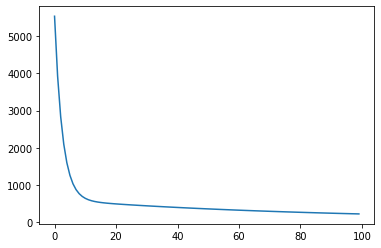

In [ ]:
plt.plot(lss) 

In [ ]:
# Predictions
preds

# linear regression using pytorch inbuilds

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


allows access to rows from inputs and targets as tuples, and provides standard APIs for working with many different types of datasets in PyTorch.

In [ ]:
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(inputs, targets)
print(train_ds[0:3])